In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import pickle

%matplotlib inline

In [2]:
# Load camera calibration
cam_calib = pickle.load(open('./data/camera_calib.p','rb'))
mtx, dist = map(cam_calib.get, ('mtx','dist'))

Test Images:


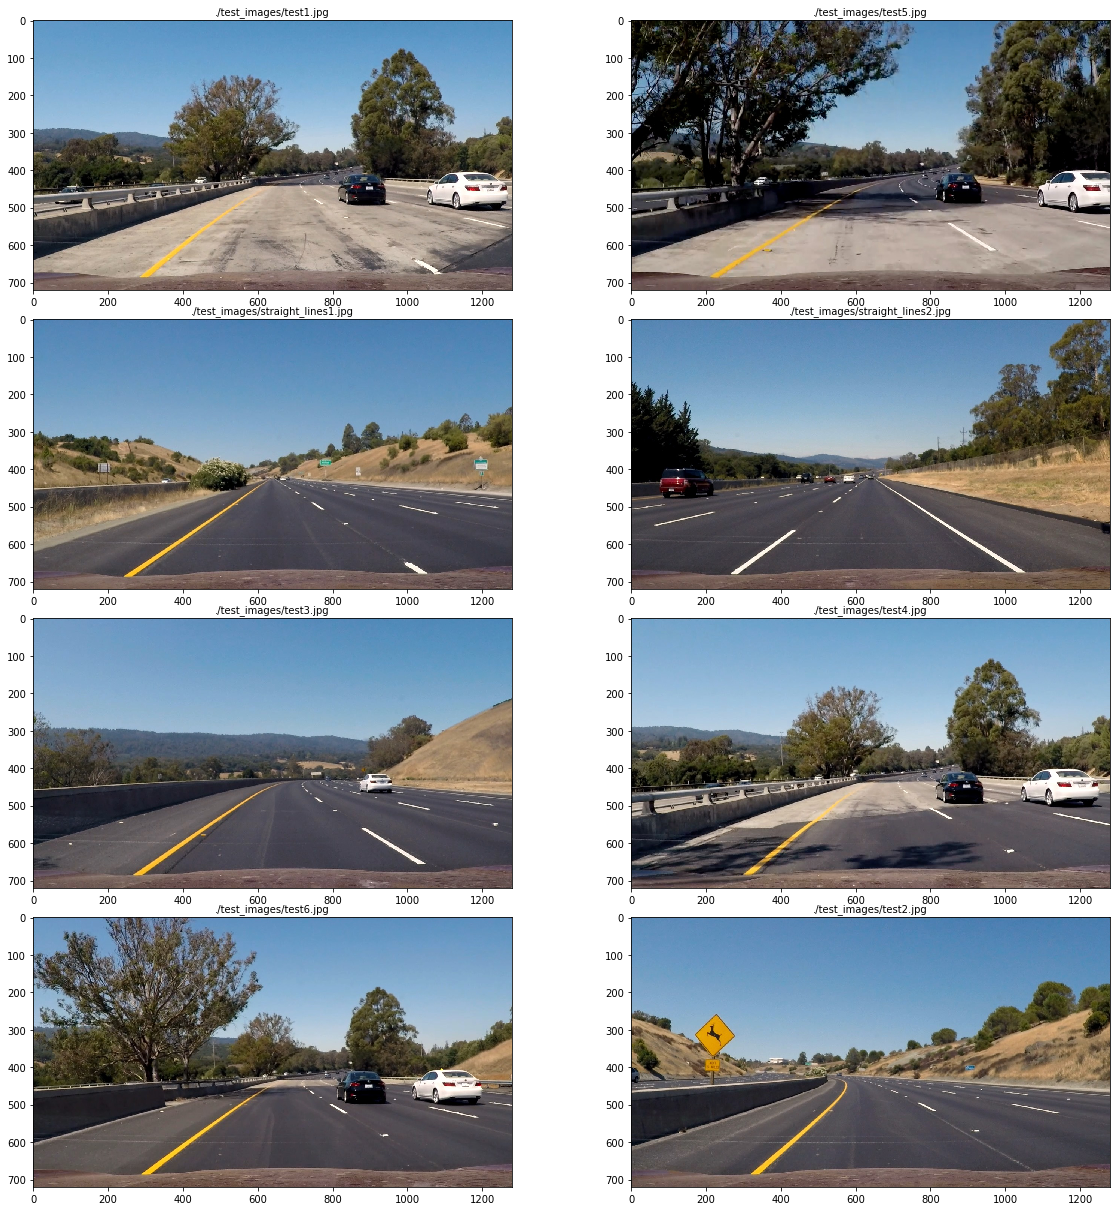

In [3]:
# Load and display test images.
test_images = []    # Store test images

# Make a list of test images
fname = glob.glob('./test_images/*.jpg')
for i, path in enumerate(fname):
    img = mpimg.imread(path)
    test_images.append(img)
    
plt.figure(figsize=(15, 12))
gridspec.GridSpec(4, 2)

print('Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    ax1.imshow(test_images[idx])
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

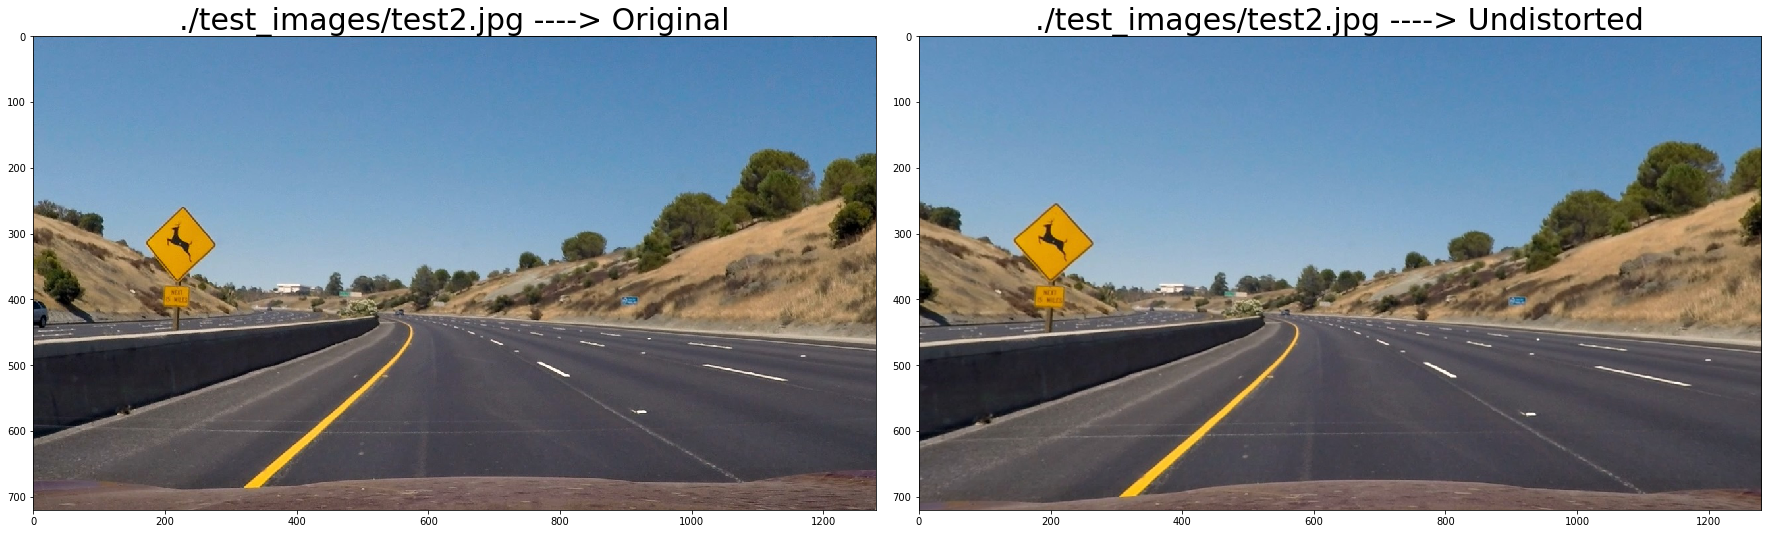

In [4]:
idx = 7
img_test = test_images[idx]                                #pick test image example
undistex = cv2.undistort(img_test, mtx, dist, None, mtx)

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
fig1.tight_layout()
ax1.imshow(img_test)
ax1.set_title(fname[idx] + ' ----> Original', fontsize=30)
ax2.imshow(undistex)
ax2.set_title(fname[idx] + ' ----> Undistorted', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
fig1.savefig('./output_images/Display_Images/test_img_calib_example.jpg')

In [5]:
def apply_undis_hls(img, mtx=mtx, dist=dist):
    undist  = cv2.undistort(img, mtx, dist, None, mtx)
    hls_img = cv2.cvtColor(undist, cv2.COLOR_RGB2HLS)
    return hls_img

hls_test = apply_undis_hls(img_test)

Color Spaces: ./test_images/test2.jpg


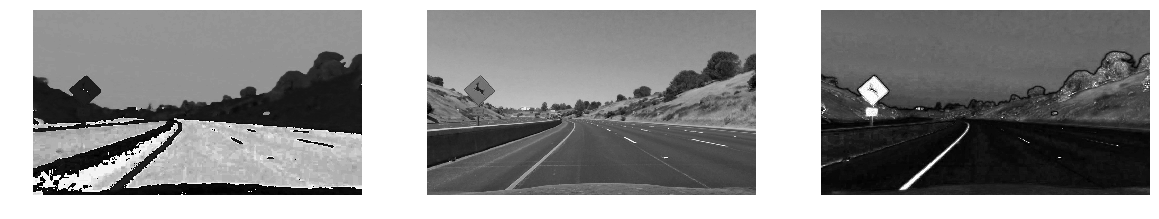

In [6]:
print('Color Spaces:', fname[idx]) # print H, L, S color spaces
fig, axs = plt.subplots(ncols=3, figsize=(20,10))
for index, a in enumerate(axs):
    a.imshow(hls_test[:,:,index], cmap='gray')
    a.axis('off')
fig.savefig('./output_images/Display_Images/HLS_exampls.jpg')

sChannel Test Images:


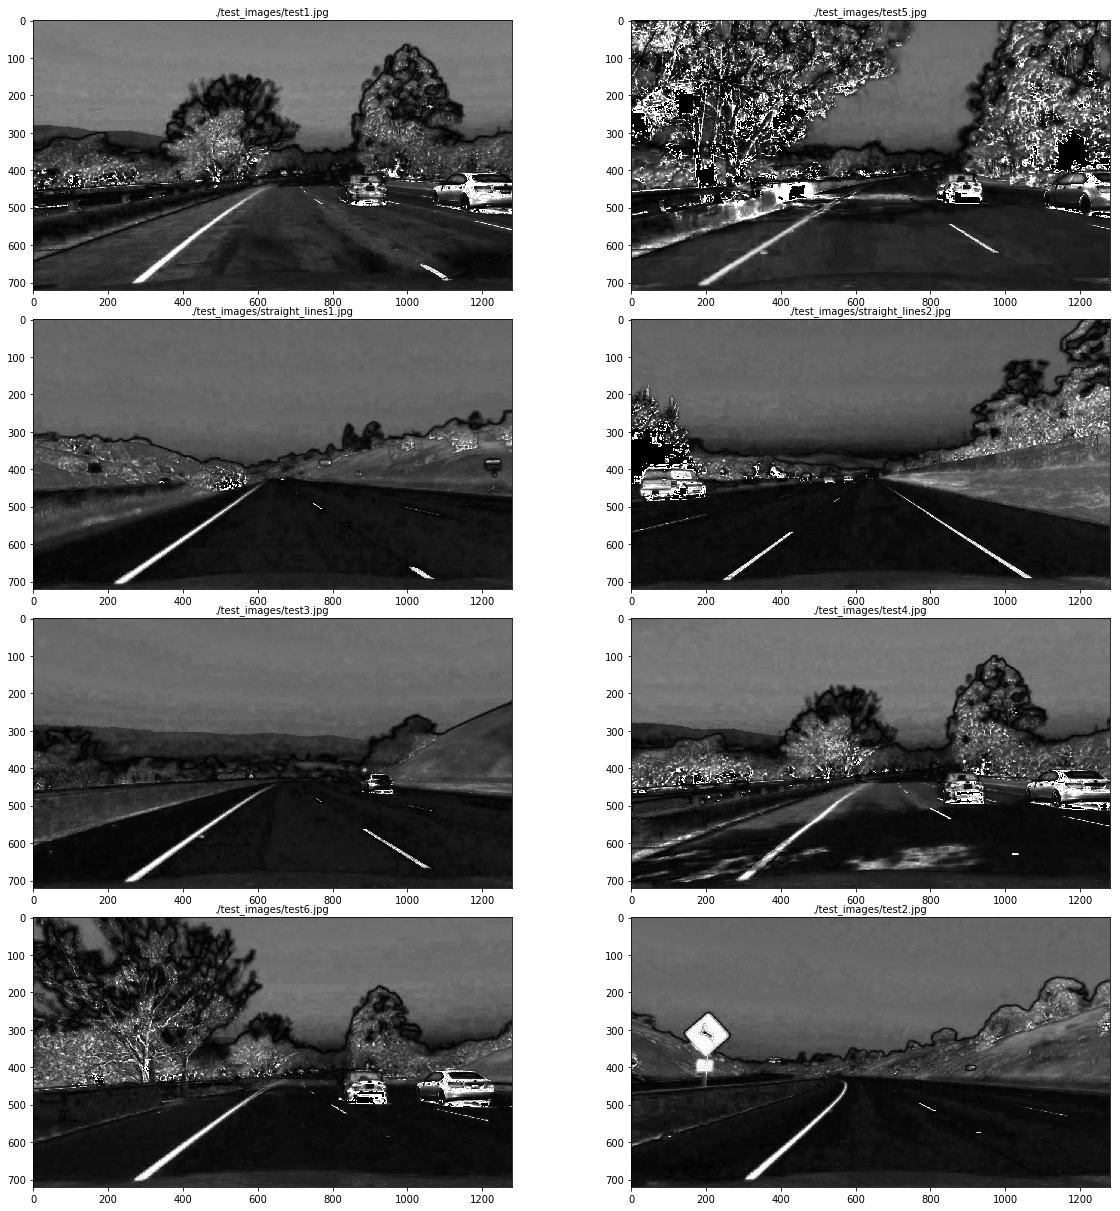

In [7]:
print('sChannel Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
hls_img = []
schannel_img = []
for ax1, idx in zip(ax.flat, range(4*2)):
    hls_img.append(apply_undis_hls(test_images[idx]))
    schannel_img.append(hls_img[idx][:,:,2])
    ax1.imshow(schannel_img[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

SobelX Test Images:


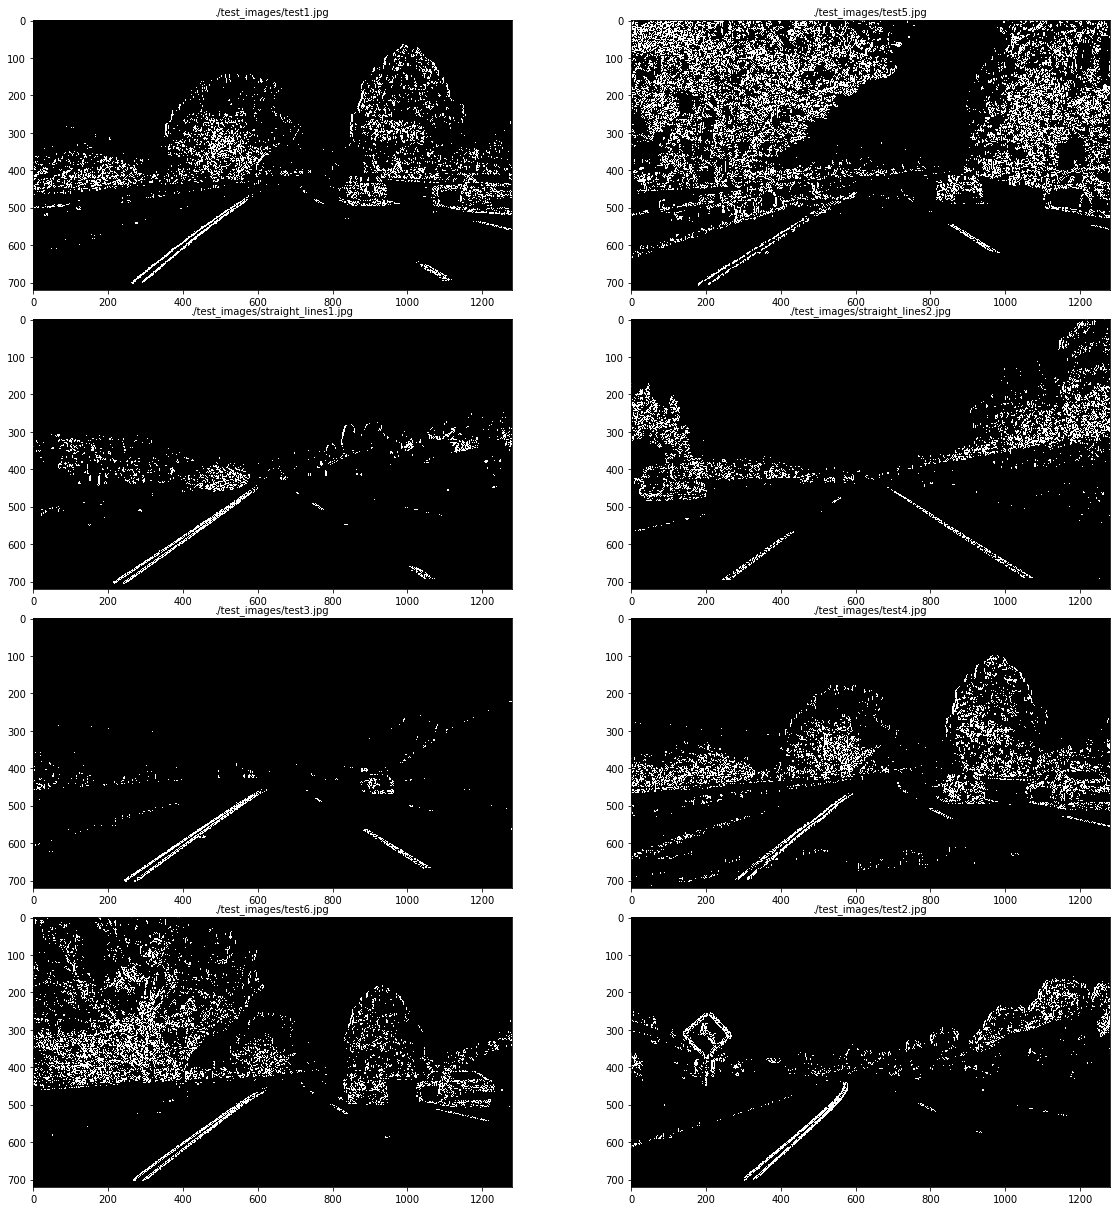

In [8]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray = img
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient=='x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sbinary
    return binary_output

grad_binaryx = []

print('SobelX Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    grad_binaryx.append(abs_sobel_thresh(schannel_img[idx], orient='x', thresh_min=20, thresh_max=100))
    ax1.imshow(grad_binaryx[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

SobelY Test Images:


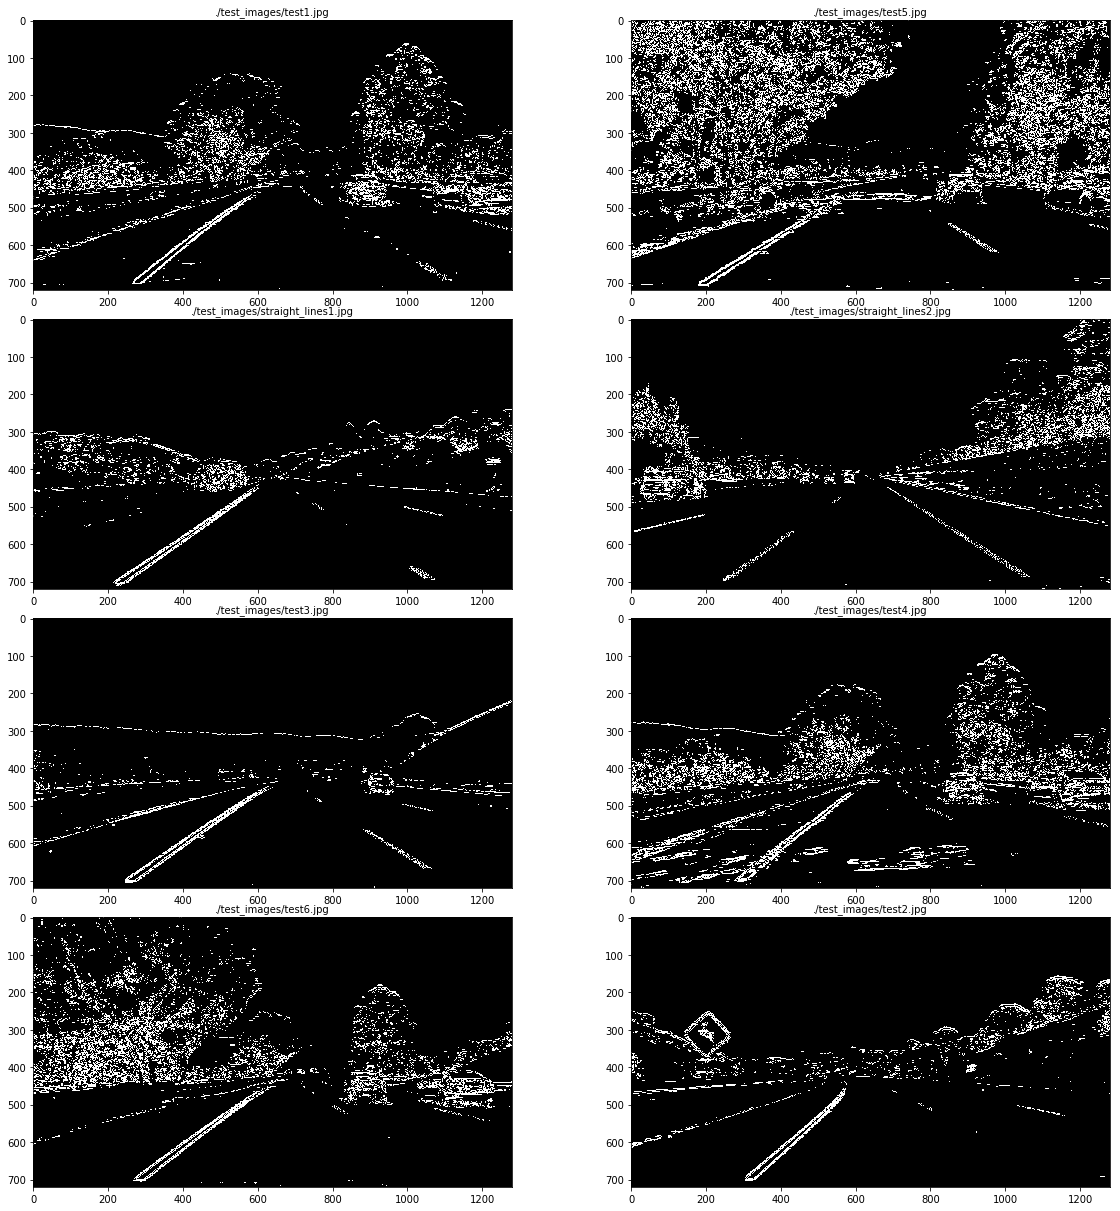

In [9]:
grad_binaryy = []

print('SobelY Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    grad_binaryy.append(abs_sobel_thresh(schannel_img[idx], orient='y', thresh_min=20, thresh_max=100))
    ax1.imshow(grad_binaryy[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Magniture Gradiant Threshold Test Images:


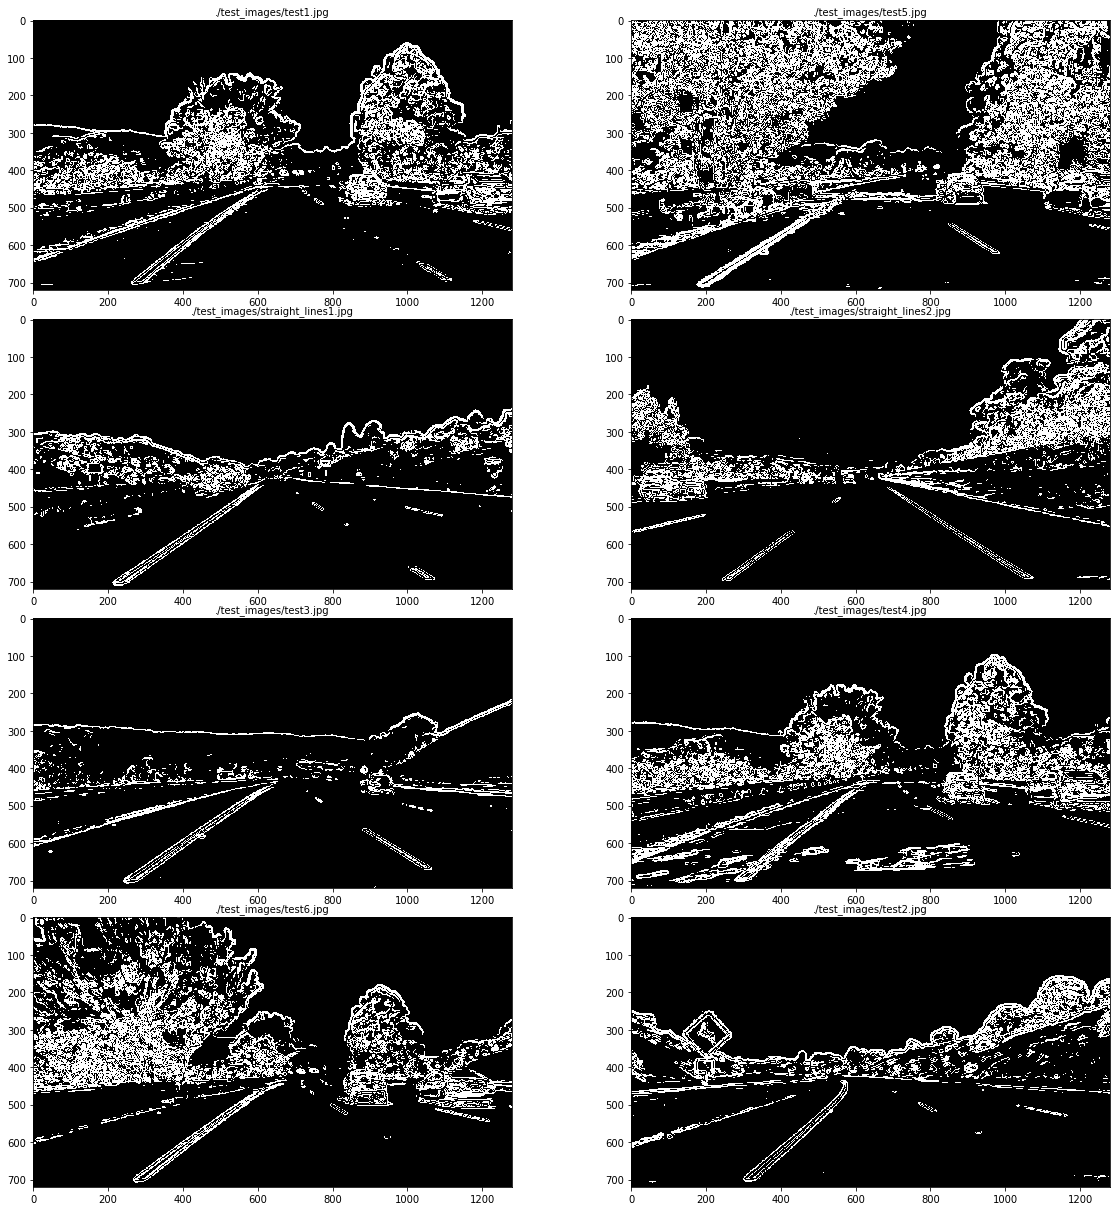

In [10]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    gray = img
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scaled_sobel = np.max(gradmag)/255 
    gradmag = (gradmag/scaled_sobel).astype(np.uint8)
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(gradmag)
    sbinary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sbinary
    return binary_output

grad_binarymag = []

print('Magniture Gradiant Threshold Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    grad_binarymag.append(mag_thresh(schannel_img[idx], sobel_kernel=9, mag_thresh=(20, 100)))
    ax1.imshow(grad_binarymag[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Color Threshold Test Images:


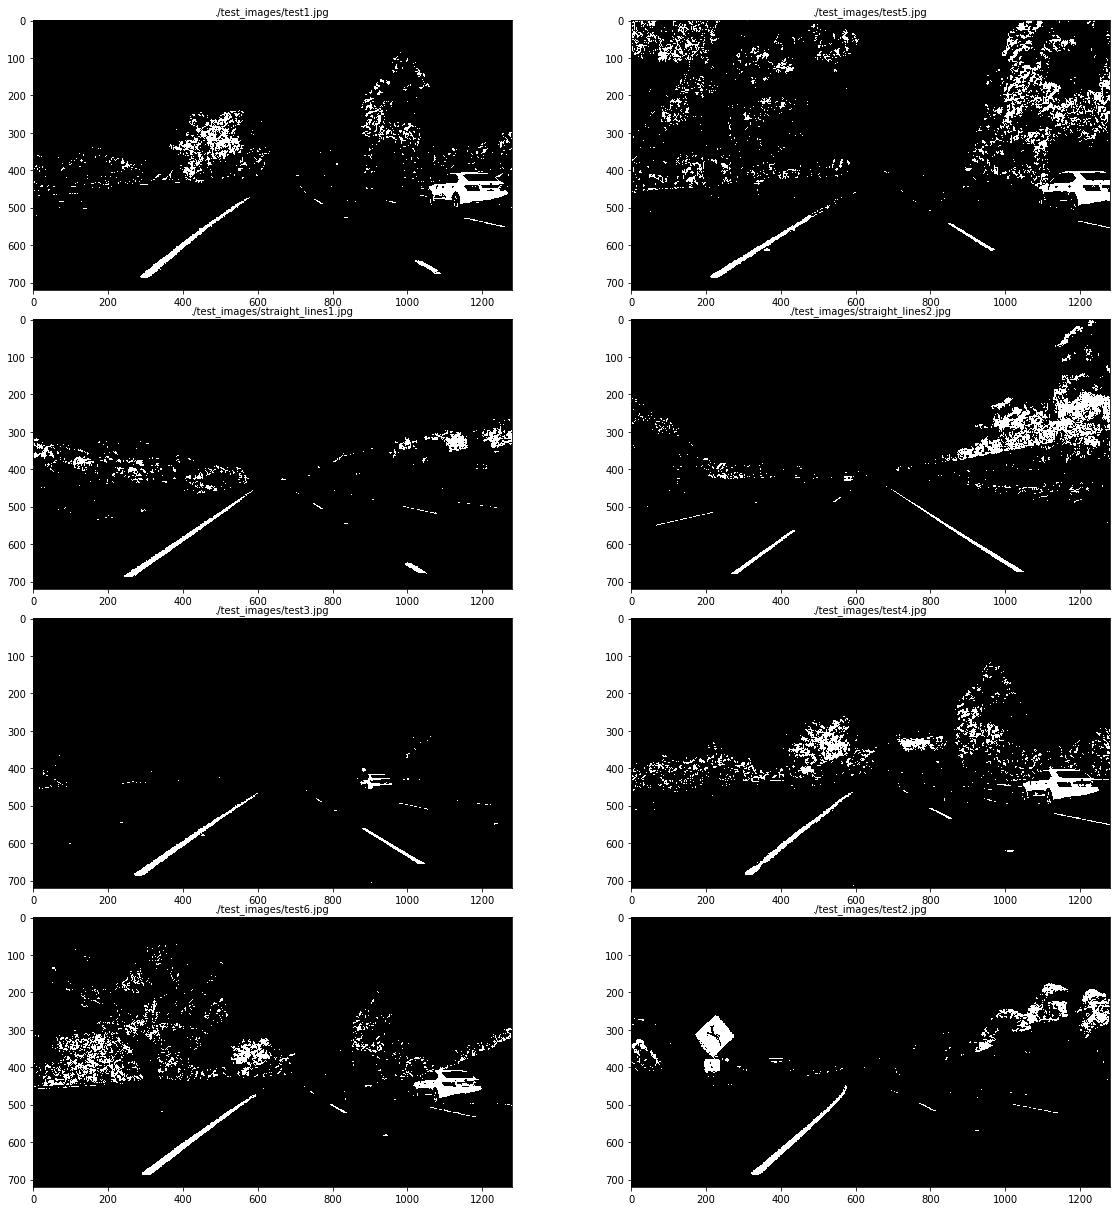

In [11]:
def color_thresh01(img):
    
    # Convert to HLS color space 
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    
    
    ## White Color
    lower_white = np.array([0,215,0], dtype=np.uint8)
    upper_white = np.array([255,255,255], dtype=np.uint8)
    white_mask = cv2.inRange(hls, lower_white, upper_white)
    
    ## Yellow Color
    lower_yellow = np.array([18,0,100], dtype=np.uint8)
    upper_yellow = np.array([30,220,255], dtype=np.uint8)
    yellow_mask = cv2.inRange(hls, lower_yellow, upper_yellow)  
    
    combined_binary = np.zeros_like(white_mask)
    combined_binary[((white_mask == 255) | (yellow_mask == 255))] = 255
    combined_binary[(combined_binary == 255)] = 1
    return combined_binary

grad_binarycolor = []

print('Color Threshold Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    grad_binarycolor.append(color_thresh01(test_images[idx]))
    ax1.imshow(grad_binarycolor[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Direction Gradiant Threshold Test Images:


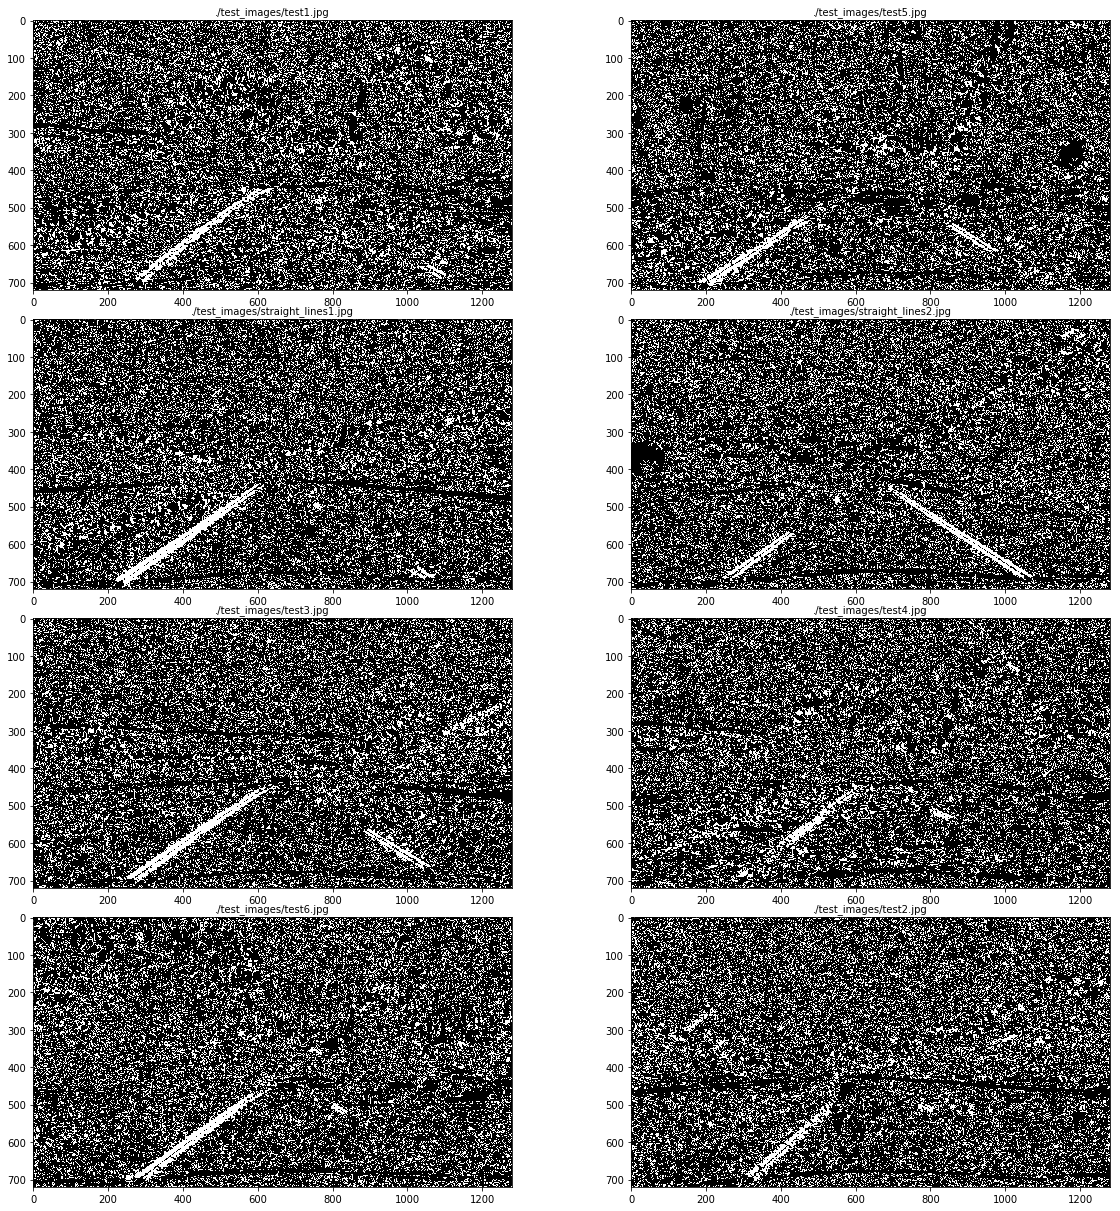

In [12]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    gray = img
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    gradsobel = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sbinary = np.zeros_like(gradsobel)
    sbinary[(gradsobel >= thresh[0]) & (gradsobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    binary_output = sbinary # Remove this line
    return binary_output

dir_binary = []

print('Direction Gradiant Threshold Test Images:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    dir_binary.append(dir_threshold(schannel_img[idx], sobel_kernel=15, thresh=(0.8, 1.2)))
    ax1.imshow(dir_binary[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Combine Thresholds:


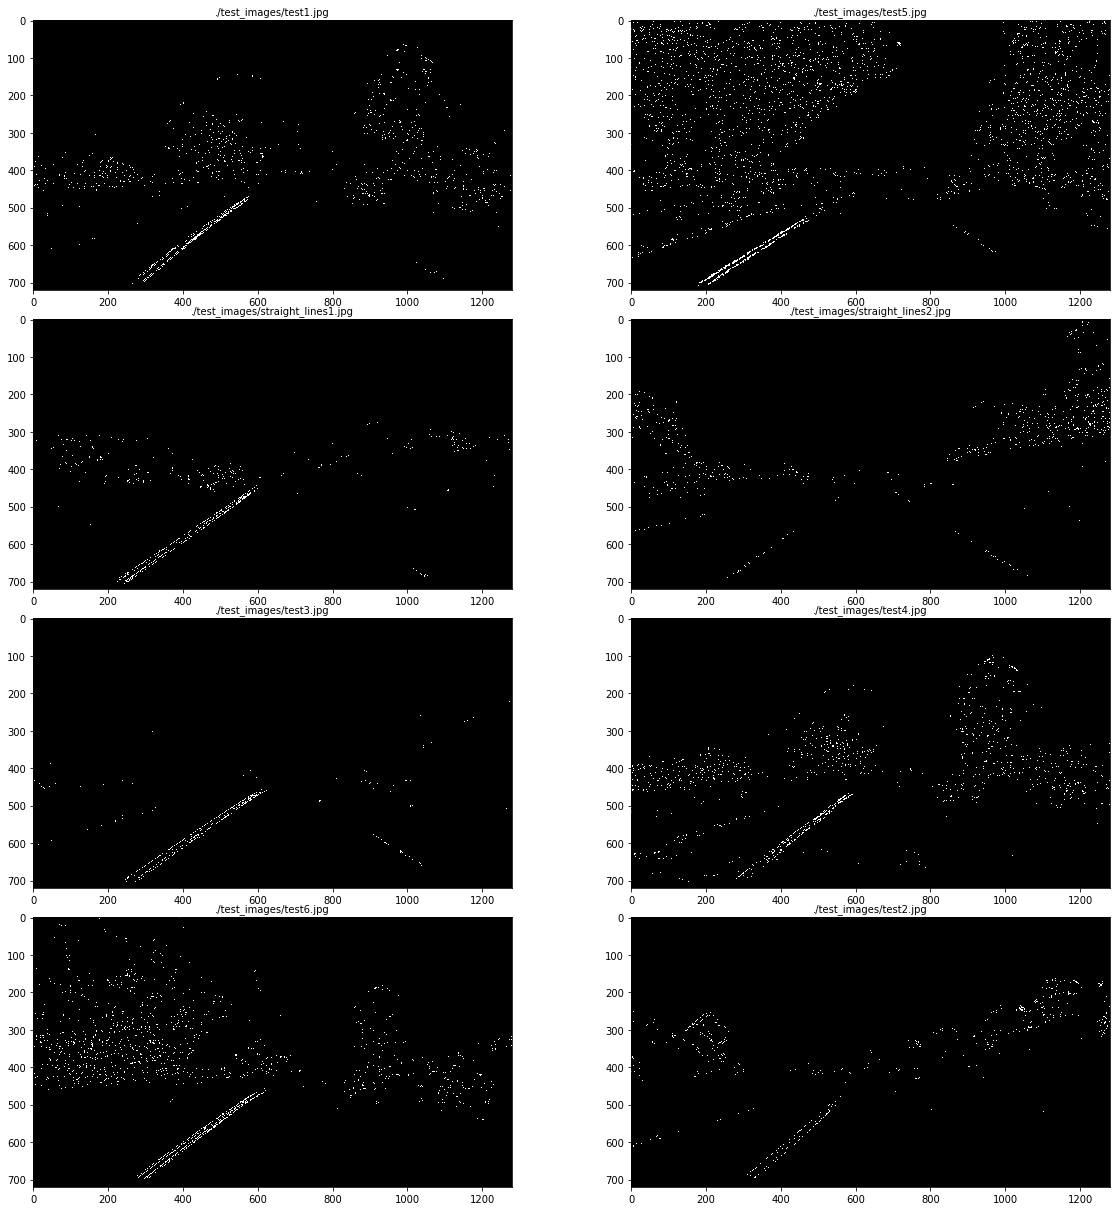

In [13]:
combine_thresh = []

print('Combine Thresholds:')
f, ax = plt.subplots(4, 2, figsize=(16, 18))
#print(ax)
f.tight_layout()
for ax1, idx in zip(ax.flat, range(4*2)):
    combined = np.zeros_like(dir_binary[idx])
    combined[((grad_binaryx[idx] == 1) & (grad_binaryy[idx] == 1) & (dir_binary[idx] == 1) & (grad_binarymag[idx] == 1))] = 1
    #combined[((grad_binaryy[idx] == 1) & (grad_binarycolor[idx] == 1))] = 1
    combine_thresh.append(combined)
    ax1.imshow(combine_thresh[idx],cmap='gray')
    ax1.set_title(fname[idx], fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Compare Side by Side:


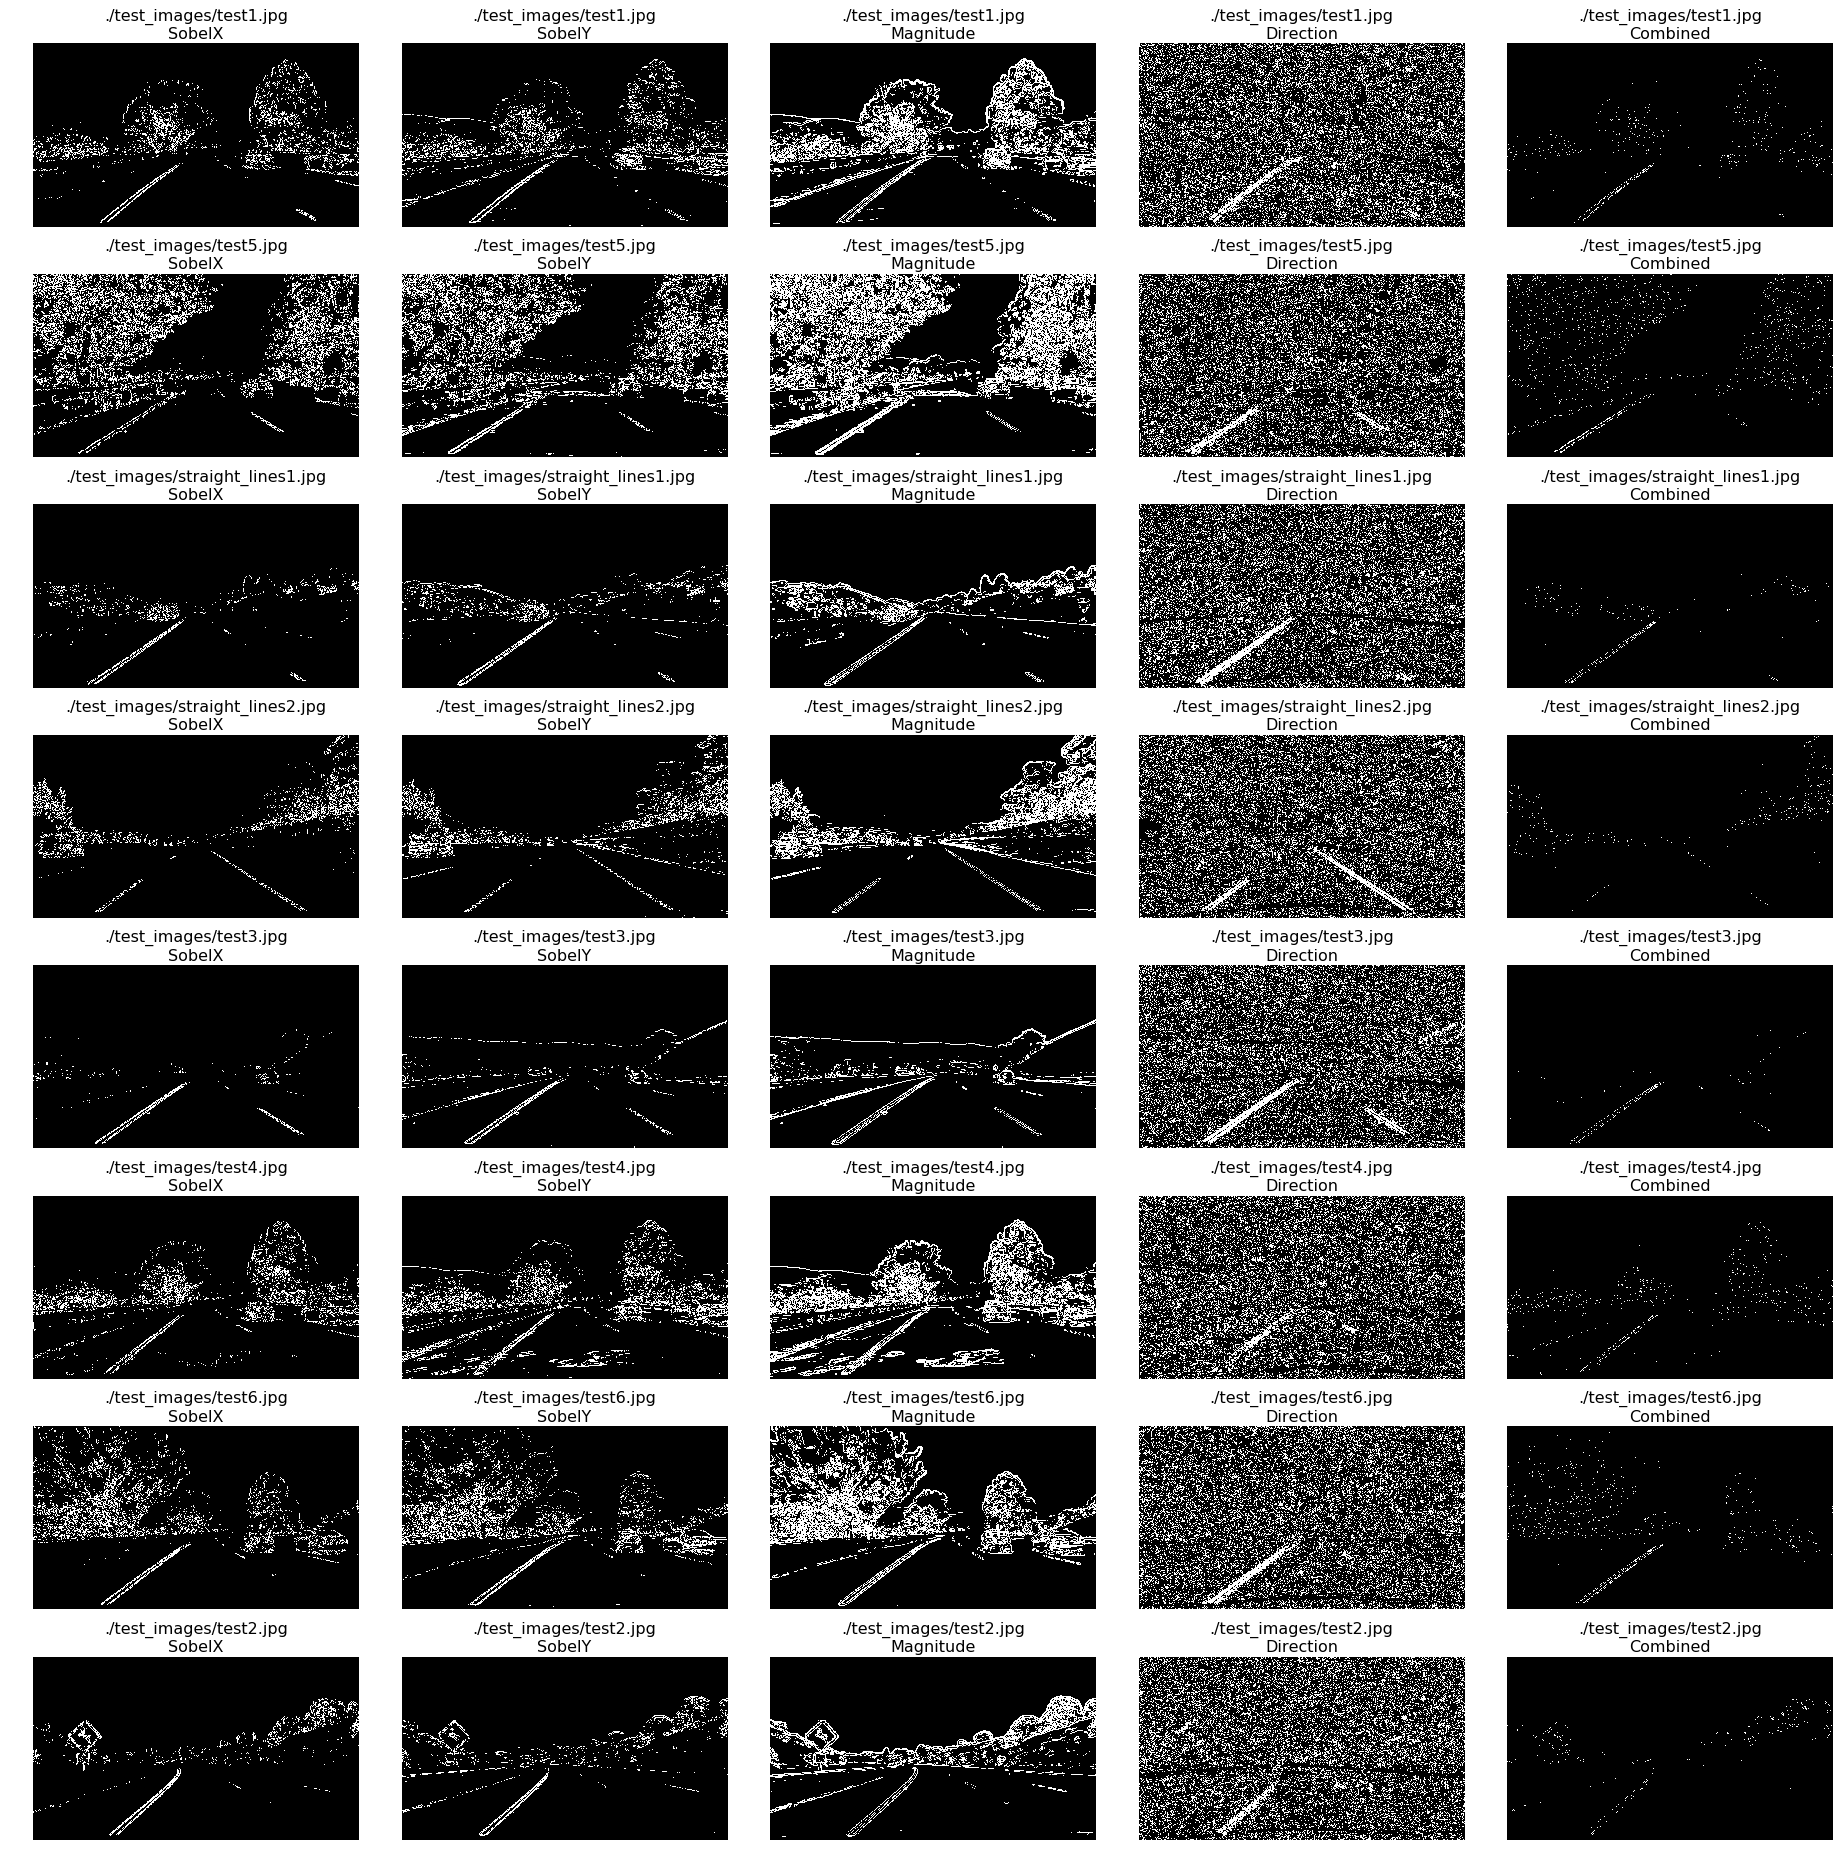

In [14]:
thresh_title = ['SobelX','SobelY','Magnitude','Direction','Combined']
compare_img  = list(zip(grad_binaryx, grad_binaryy, grad_binarymag, dir_binary, combine_thresh))
img_title = []
flat_img     = [item for sublist in compare_img for item in sublist]
for ii in range(8):
    for jj in range(5):
        img_title.append(fname[ii] + '\n' + thresh_title[jj])
print('Compare Side by Side:')
f, ax = plt.subplots(8, 5, figsize=(25, 28))
f.tight_layout()
for ax1, idx in zip(ax.flat, range(8*5)):
    ax1.imshow(flat_img[idx],cmap='gray')
    ax1.set_title(img_title[idx], fontsize=16)
    ax1.axis('off')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('./output_images/Display_Images/combined_sobelxy_threshold.jpg')